In [1]:
#Erstellen einer Stichprobe:
import pandas as pd
x = pd.Series([21, 13,  8, 14, 10, 12,  5])
x.mean()


11.857142857142858

In [2]:
#Bootstrap-Stichproben erhält man, in dem man die N-Werte immer wieder zurücklegt (replace=True)
x.sample(n=len(x), replace=True) 


2     8
6     5
1    13
3    14
2     8
5    12
0    21
dtype: int64

In [3]:
#Bootstrapping-Verfahren mit 10000 Simulationen S=10000. Mit einer for Schleife wird die Simulation wiederholt:
x_means = []
S=10000
for i in range(S):
    x_mean = x.sample(n=len(x), replace=True).mean()
    x_means.append(x_mean)


/home/claudia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

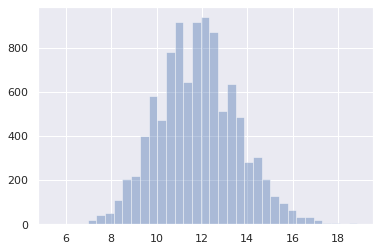

In [4]:
#Die Mittelwerte jeder Simulation werden in der Liste x_means abgespeichert. Die Liste enthält nun eine empirische Stichprobenverteilung des Mittelwerts. 
#Nun kannst Du Dir die Verteilung des Stichproben-Mittelwertes beispielsweise in einem Histogramm ansehen:

#matplotlib inline
import seaborn as sns
sns.set()
sns.distplot(x_means, kde=False, bins=35)


In [5]:
#Wie viele Mittelwerte liegen zwischen 9 und 11?
x_means = pd.Series(x_means)
x_means.between(9,11).mean()


0.3034

In [6]:
#Die Stichprobenmittelwerte aus der Bootstraping-Simulation werden zuerst in eine Series umgewandelt. Mit der Funktion quantile können die Quantile der Stichprobenverteilung bestimmt werden. 
#Sie entsprechen dem geschätzten Konfidenzintervall zum Signifikanzniveau α.
x_means = pd.Series(x_means)
alpha = 0.10
x_means.quantile((alpha/2,1-alpha/2))


0.05     9.000000
0.95    14.857143
dtype: float64

## Signifikanz:

Von einem signifikanten Unterschied spricht man, wenn die Differenz zwischen den Mittelwerten zweier Stichproben so groß ist, dass es sehr Unwahrscheinlich ist, dass dieser Unterschied alleine aufgrund der rein zufälligen Schwankungen durch die Stichprobenziehung entstanden ist.

Wir können das bisherige Bootstrapping-Verfahren auch hier anwenden, um die Stichprobenverteilung von dxy=x¯−y¯ zu schätzen. In jeder Simulation s=1,…,S erstellen wir eine Bootstrapping-Stichprobe von x und y und berechnen darauf die Differenz dxy über die Mittelwerte.
Im Signifikanzniveau α=0.05 erhalten wir mit den Quantilen dα2 und d1−α2 das 95%-Konfidenzintervall für die Mittelwertdifferenz. Mit einer Wahrscheinlichkeit von 1−α=95% überdeckt das Konfidenzintervall damit den unbekannten Populationsparameter Δxy=μx−μy.
Liegt das Konfidenz-Intervall für die Differenz zweier Mittelwerte ausschließlich im positiven oder negativem Bereich (also außerhalb des Nullpunktes), können wir daraus schließen, dass die beiden Stichproben mit hoher Evidenz unterschiedlichen Populationen mit verschiedenen Mittelwerten entstammen. Die aufgestellte Hypothese kann deswegen abgelehnt werden.

Überdeckt das KI hingegen die Null, so kann nicht ausgeschlossen werden, dass die wahre Mittelwertdifferenz Null ist. In diesem Fall können wir die Hypothese nicht ablehnen.

In [7]:
import pandas as pd

alpha = 0.05
S=10000

x = pd.Series([3, 3, 5, 8, 7, 3, 2, 5, 8, 1])
y = pd.Series([3, 10, 9, 8, 2, 3, 6, 7, 11, 6])

print((x.mean(), y.mean()))

dxy = []
for i in range(S):
    x_mean = x.sample(n=len(x), replace=True).mean()
    y_mean = y.sample(n=len(y), replace=True).mean()
    dxy.append(x_mean - y_mean )

pd.Series(dxy).quantile((alpha/2, 1-alpha/2))


(4.5, 6.5)


0.025   -4.3
0.975    0.4
dtype: float64